<a href="https://colab.research.google.com/github/seleonores/Air-Quality-regression/blob/main/Air_quality_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

In [4]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [5]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str),
                                 format='%d/%m/%Y %H.%M.%S', errors='coerce')
df['hour'] = df['Datetime'].dt.hour
df['weekday'] = df['Datetime'].dt.weekday
df['month'] = df['Datetime'].dt.month

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Datetime       9357 n

In [7]:
df = df.sort_values('Datetime').reset_index(drop=True)

In [8]:
df.dropna(inplace=True)

In [9]:
print(df.tail())

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH            Datetime  hour  weekday  \
9352       1729.0  21.9  29.3  0.7568 2005-04-04 10:00:00  10.0      0.0   
9353  

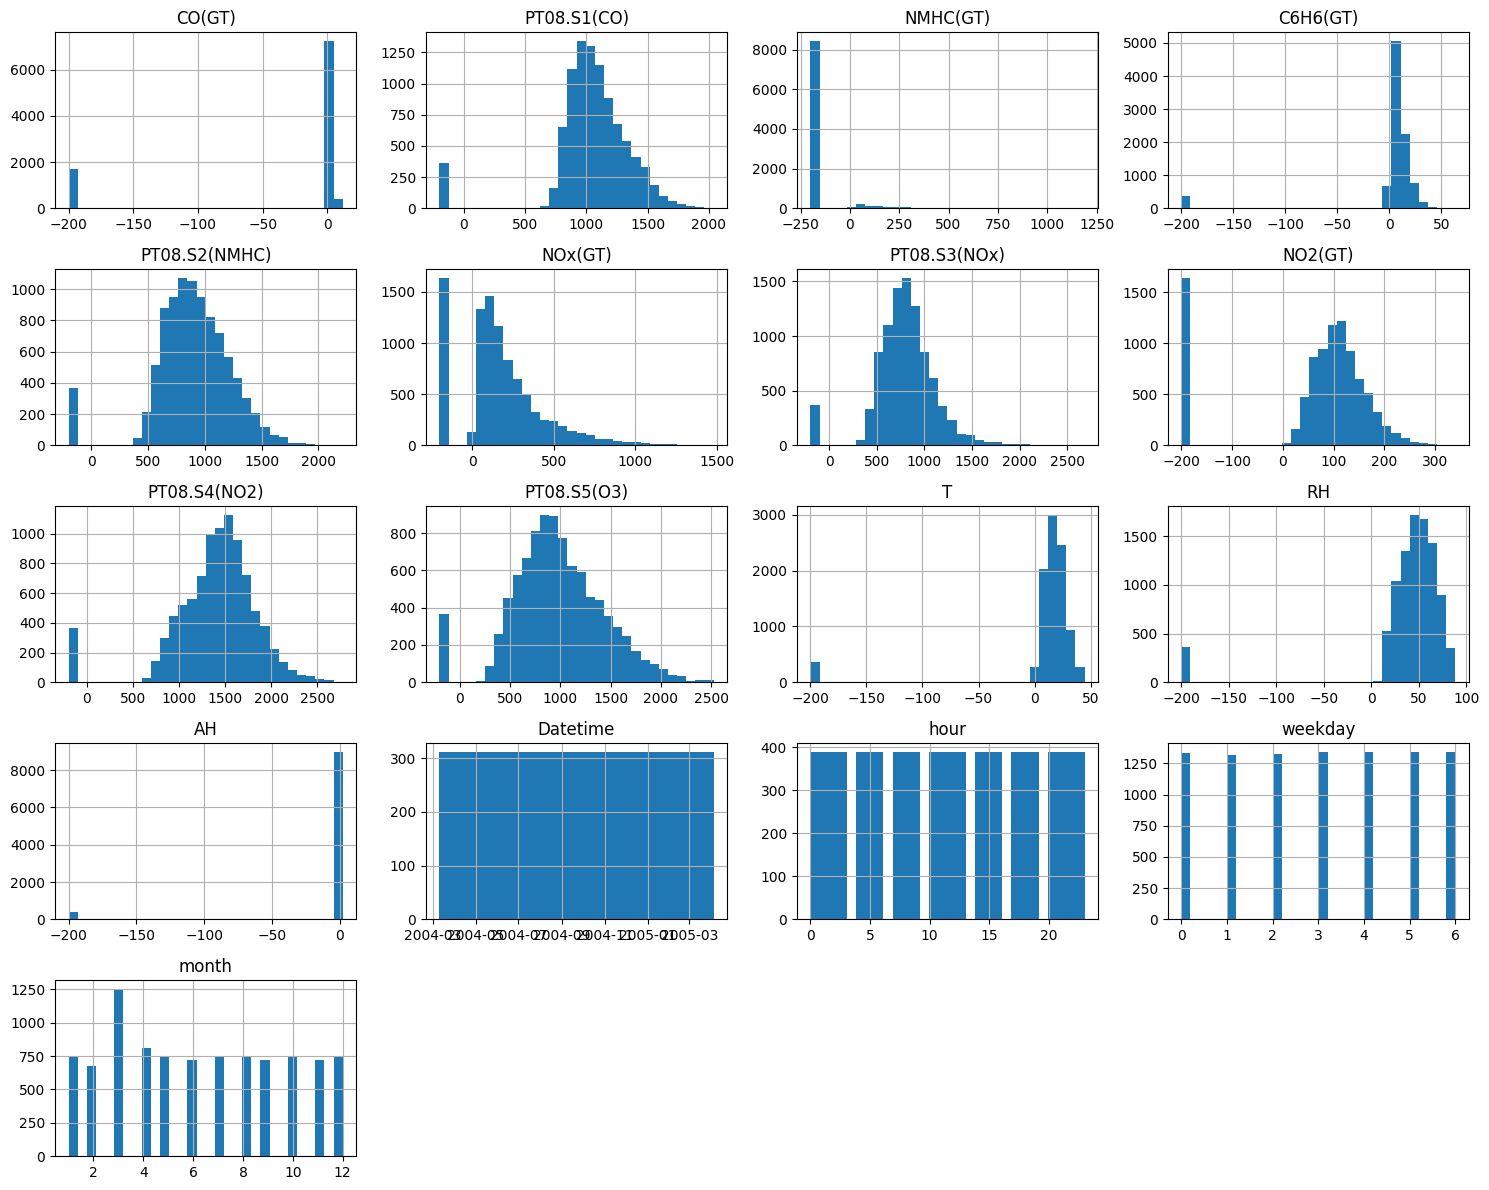

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [11]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,hour,weekday,month
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00,10.0,0.0,4.0
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00,11.0,0.0,4.0
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00,12.0,0.0,4.0
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00,13.0,0.0,4.0
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2005-04-04 14:00:00,14.0,0.0,4.0


In [12]:
df.replace(-200, np.nan, inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Datetime         0
hour             0
weekday          0
month            0
dtype: int64


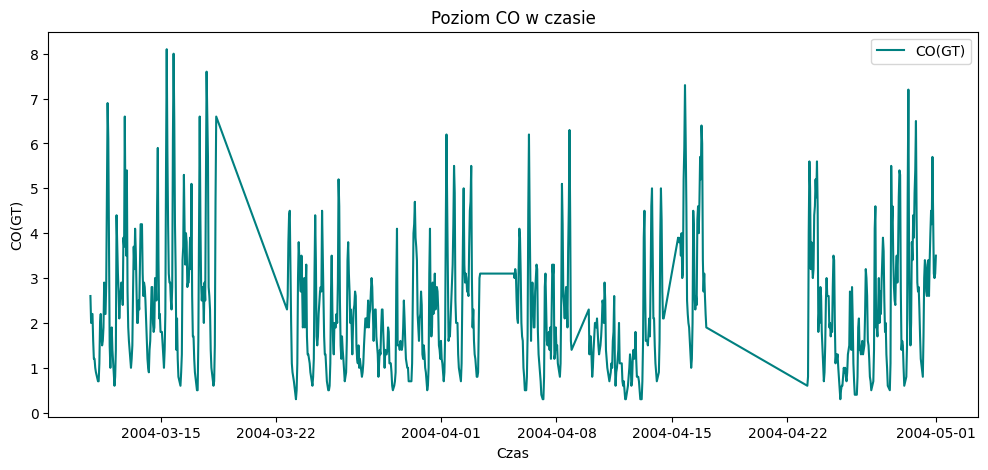

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df['Datetime'], df['CO(GT)'], label='CO(GT)', color='teal')
plt.xlabel('Czas')
plt.ylabel('CO(GT)')
plt.title('Poziom CO w czasie')
plt.legend()
plt.show()

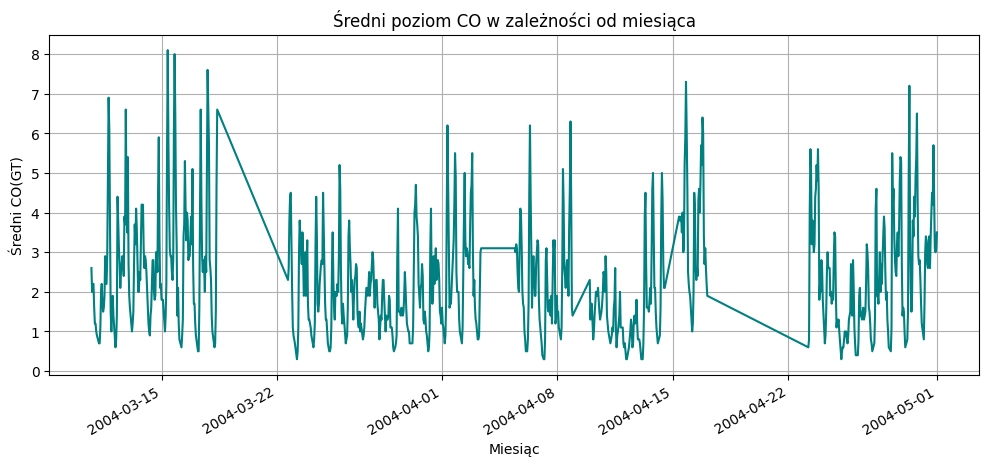

In [16]:
plt.figure(figsize=(12, 5))
df_clean = df[df['CO(GT)'] != -200]  # usuwamy brakujące wartości
df_clean.groupby('Datetime')['CO(GT)'].mean().plot(kind='line', color='teal')
plt.xlabel('Miesiąc')
plt.ylabel('Średni CO(GT)')
plt.title('Średni poziom CO w zależności od miesiąca')
plt.grid(True)
plt.show()

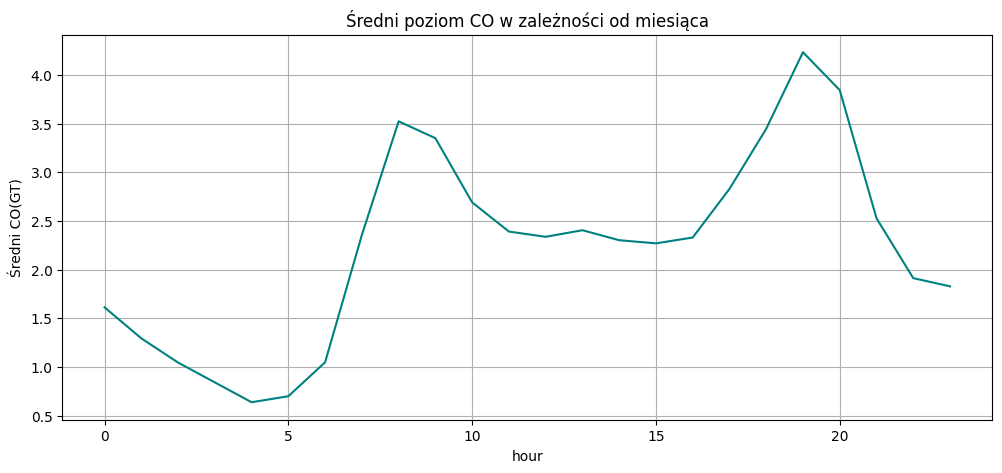

In [17]:
plt.figure(figsize=(12, 5))
df_clean = df[df['CO(GT)'] != -200]  # usuwamy brakujące wartości
df_clean.groupby('hour')['CO(GT)'].mean().plot(kind='line', color='teal')
plt.xlabel('hour')
plt.ylabel('Średni CO(GT)')
plt.title('Średni poziom CO w zależności od miesiąca')
plt.grid(True)
plt.show()

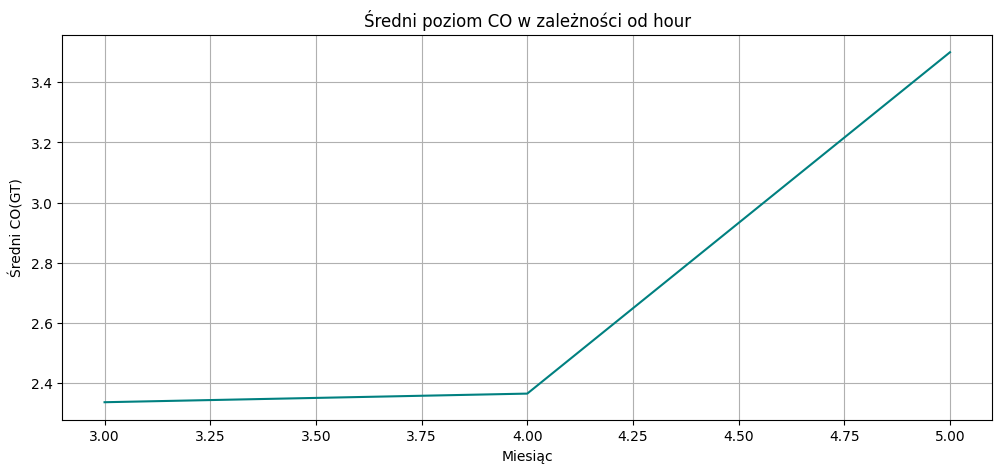

In [18]:
plt.figure(figsize=(12, 5))
df_clean = df[df['CO(GT)'] != -200]  # usuwamy brakujące wartości
df_clean.groupby('month')['CO(GT)'].mean().plot(kind='line', color='teal')
plt.xlabel('Miesiąc')
plt.ylabel('Średni CO(GT)')
plt.title('Średni poziom CO w zależności od hour')
plt.grid(True)
plt.show()

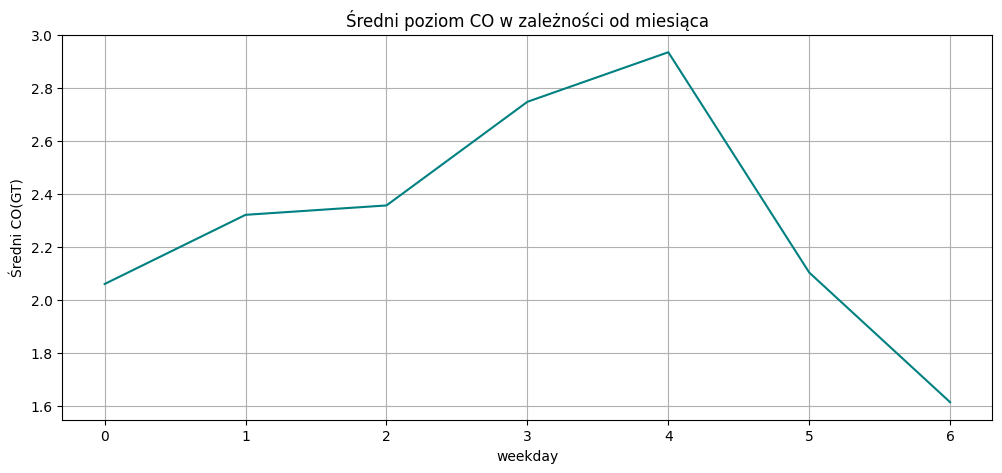

In [19]:
plt.figure(figsize=(12, 5))
df_clean = df[df['CO(GT)'] != -200]  # usuwamy brakujące wartości
df_clean.groupby('weekday')['CO(GT)'].mean().plot(kind='line', color='teal')
plt.xlabel('weekday')
plt.ylabel('Średni CO(GT)')
plt.title('Średni poziom CO w zależności od miesiąca')
plt.grid(True)
plt.show()

In [20]:
X = df.drop(columns=['CO(GT)','Datetime', 'Date', 'Time'])
y = df['CO(GT)']

In [21]:
X

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,weekday,month
0,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0,2.0,3.0
1,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0,2.0,3.0
2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0,2.0,3.0
3,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0,2.0,3.0
4,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345,20.0,4.0,4.0
1227,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529,21.0,4.0,4.0
1228,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579,22.0,4.0,4.0
1229,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422,23.0,4.0,4.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.9737100104337639
RMSE: 0.23393688006687113


In [25]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [26]:
X.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,weekday,month
0,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0,2.0,3.0
1,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0,2.0,3.0
2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0,2.0,3.0
3,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0,2.0,3.0
4,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0,2.0,3.0


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    827 non-null    float64
 1   NMHC(GT)       827 non-null    float64
 2   C6H6(GT)       827 non-null    float64
 3   PT08.S2(NMHC)  827 non-null    float64
 4   NOx(GT)        827 non-null    float64
 5   PT08.S3(NOx)   827 non-null    float64
 6   NO2(GT)        827 non-null    float64
 7   PT08.S4(NO2)   827 non-null    float64
 8   PT08.S5(O3)    827 non-null    float64
 9   T              827 non-null    float64
 10  RH             827 non-null    float64
 11  AH             827 non-null    float64
 12  hour           827 non-null    float64
 13  weekday        827 non-null    float64
 14  month          827 non-null    float64
dtypes: float64(15)
memory usage: 103.4 KB
